# Actividad semana 7

Brenda Zurazy Rodríguez Pérez

**A01793984**

---
Materia: Ciencia y analítica de Datos

Maestra: Maria de la Paz Rico

**09/noviembre/2022**


# Linear Models

- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

### Para evaluar el error en los modelos de regresión

**1. Error cuadrático medio (RMSE)**

>  $RMSE = \sqrt{\tfrac{1}{n}\sum_{i=1}^{n}(yi-ŷi)^2}$









Representa a la raíz cuadrada de la distancia cuadrada promedio entre el valor real y el valor pronosticado.

Como la raíz cuadrada de una varianza, RMSE se puede interpretar como la desviación estándar de la varianza inexplicada, y tiene la propiedad útil de estar en las mismas unidades que la variable de respuesta.

Los valores más bajos de RMSE indican un mejor ajuste. RMSE es una buena medida de la precisión con que el modelo predice la respuesta, y es el criterio más importante para ajustar si el propósito principal del modelo es la predicción.

**2. Error absoluto medio (MAE)**

> $MAE=\tfrac{1}{n}\sum_{i=1}^{n} \left|yi-ŷi\right|$

Es el promedio de la diferencia absoluta entre el valor observado y los valores predichos. El error absoluto medio o MAE es un puntaje lineal

**3. R-cuadrado**

Indica la bondad o la aptitud del modelo, a menudo se utiliza con fines descriptivos y muestra que también las variables independientes seleccionadas explican la variabilidad en sus variables dependiente. 

> $R^2 = 1-\frac{\sum_{i}^{n}\left|yi-\hat{yi} \right|}{\sum_{i}^{n}\left|yi-\bar{yi} \right|}$

Tiene la propiedad útil de que su escala es intuitiva, va de 0 a 1, con 0 indicando que el modelo propuesto no mejora la predicción sobre el modelo medio y 1 indica una predicción perfecta. 

Una de las dificultades de R-cuadrado es que solo puede aumentar a medida que se agregan predictores al modelo de regresión. Este aumento es artificial cuando los predictores no mejoran el ajuste del modelo. Para remediar esto, una estadística relacionada es R-cuadrado ajustado, incorpora los grados de libertad del modelo. El R-cuadrado ajustado disminuirá a medida que agreguen predictores si el aumento en el ajuste del modelo no compensa la pérdidas de grados de libertad. Asimismo, aumentará a medida que se agreguen predictores si vale la pena el aumento en el ajuste del modelo.

**El R-cuadrado ajustado** siempre se debe usar con modelos con más de una variable de predicción. **Se interpreta como la proporción de la varianza total que se explica por el modelo.**

# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
180,3.229599,39.081026
92,2.741250,54.327159
33,1.987770,62.596005
556,4.615855,29.621427
37,2.064921,54.902748
184,3.254586,54.686981
694,5.112337,33.418000
836,5.665156,33.554747
114,2.877590,55.150950
591,4.737484,42.069786


In [ ]:
#¿falta algún dato?
df.isnull().values.any()

False

In [ ]:
df.describe().round(2)

,Number of Units,Manufacturing Cost
count,1000.00,1000.00
mean,4.47,40.05
std,1.34,10.60
min,1.00,20.00
25%,3.59,32.91
50%,4.44,38.35
75%,5.32,44.53
max,10.00,100.00


In [ ]:
X = df[['Number of Units']]
y = df[['Manufacturing Cost']]

In [ ]:
len(X)

1000

In [ ]:
y.describe().round(2)

,Manufacturing Cost
count,1000.00
mean,40.05
std,10.60
min,20.00
25%,32.91
50%,38.35
75%,44.53
max,100.00


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 1000
**************************************************
Numero total de registros en el training set: 900
Tamaño de X_train: (900, 1)
**************************************************
Mumero total de registros en el test dataset: 100
Tamaño del X_test: (100, 1)


## Regresión Lineal

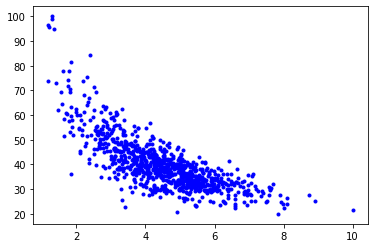

In [ ]:
#Graficamos los datos de entrenamiento
plt.plot(X_train,y_train,'b.')

In [ ]:
#Regresión lineal
from sklearn.linear_model import LinearRegression

#Definimos el  modelo
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

LinearRegression()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


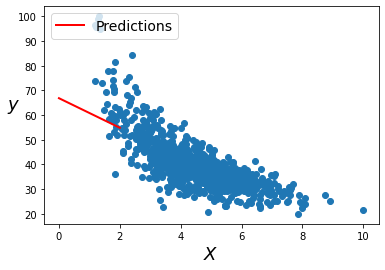

In [ ]:
# Contruimos la línea que mejor se ajuste
X_train_fit = np.linspace(0, 2, 100)
y_train_fit = linear_reg.predict(X_train_fit[:, np.newaxis])

plt.scatter(X_train, y_train)
plt.plot(X_train_fit, y_train_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [ ]:
#Obteniendo el coeficiente y el interceptor
linear_reg.coef_, linear_reg.intercept_

(array([[-5.98882699]]), array([66.83650741]))

The model estimates:

$ŷ=-5.6X+66.8$


In [ ]:
print("Coeficiente de determinación R^2:", linear_reg.score(X_train, y_train))

Coeficiente de determinación R^2: 0.5746524649404298


Una vez entrenado el modelo, se evalúa la capacidad predictiva empleando el conjunto de test.

In [ ]:
yhat = linear_reg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


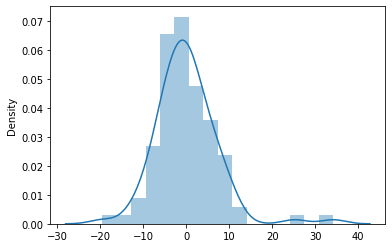

In [ ]:
sns.distplot(y_test-yhat)

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = yhat,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 7.108963321847682


Las predicciones del modelo final se alejan en promedio 7.10 unidades del valor real.

In [ ]:
#Sacando la R2
precision = linear_reg.score(X_test, y_test)
precision

0.6116251549562579

## Regresión polinomial

In [ ]:
#Regresión polinomial
from sklearn.preprocessing import PolynomialFeatures
poli_reg = PolynomialFeatures(degree = 2)

In [ ]:
X_train_poli = poli_reg.fit_transform(X_train)
X_test_poli = poli_reg.fit_transform(X_test)

In [ ]:
#Definimos el algoritmo a utilizar
from sklearn import linear_model
pr = linear_model.LinearRegression()

In [ ]:
#Entrenamos el modelo
pr.fit(X_train_poli, y_train)

LinearRegression()

In [ ]:
#Realizamos una predicción
Y_pred_pr = pr.predict(X_test_poli)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


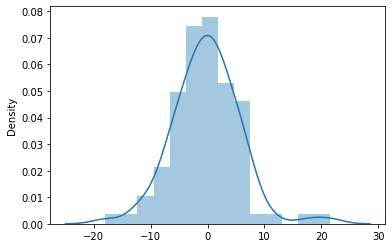

In [ ]:
sns.distplot(y_test-Y_pred_pr)

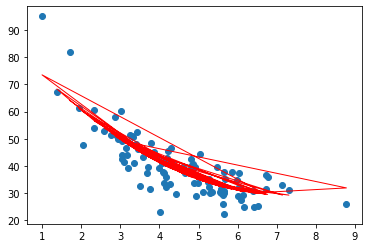

In [ ]:
#Graficamos los datos junto con el modelo
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred_pr, color='red', linewidth=1)
plt.show()

In [ ]:
print('Valor de la pendiente o coeficiente "a":')
print(pr.coef_)

Valor de la pendiente o coeficiente "a":
[[  0.         -16.40638102   1.13136095]]


In [ ]:
print('Valor de la intersección o coeficiente "b":')
print(pr.intercept_)

Valor de la intersección o coeficiente "b":
[88.80179909]


The model estimates:

$ŷ=-16.4X+1.1X^2+88.8$

In [ ]:
from sklearn.metrics import mean_squared_error
rmse_poly = mean_squared_error(
        y_true  = y_test,
        y_pred  =  Y_pred_pr,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse_poly}")


El error (rmse) de test es: 5.832771301068424


In [ ]:
#Sacando la R2
print('Precisión del modelo:')
print(pr.score(X_train_poli, y_train))

Precisión del modelo:
0.6552276217097528


## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
#Definimos el modelo
model = Ridge()
model.fit(X_train,y_train)

Ridge()

In [ ]:
#Entrenado el modelo
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


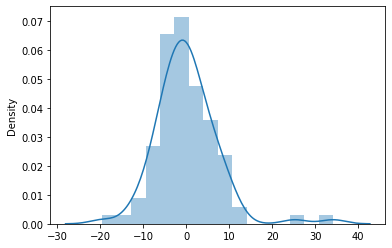

In [ ]:
sns.distplot(y_test-y_pred)

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score
print(r2_score(y_test,y_pred))

0.611578926493084


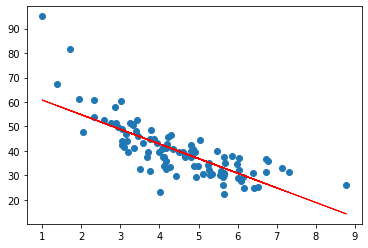

In [ ]:
#Graficamos los datos junto con el modelo
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=1)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
rmse_ridge = mean_squared_error(
        y_true  = y_test,
        y_pred  =  y_pred,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse_ridge}")


El error (rmse) de test es: 7.10938640108989


In [ ]:
#Sacando la R2
precision = model.score(X_test, y_test)
precision

0.611578926493084

## Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
# defininición del modelo
model_lasso = Lasso(alpha=1.0)
model_lasso.fit(X_train,y_train)

Lasso()

In [ ]:
#Predicción 
y_pred_lasso = model_lasso.predict(X_test)

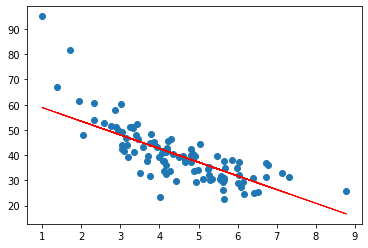

In [ ]:
#Graficamos los datos junto con el modelo
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_lasso, color='red', linewidth=1)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
rmse_ridge = mean_squared_error(
        y_true  = y_test,
        y_pred  =  y_pred_lasso,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse_ridge}")


El error (rmse) de test es: 7.2156139275269515


In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score
print(r2_score(y_test,y_pred_lasso))

0.5998847335404536


In [ ]:
precision = model_lasso.score(X_test, y_test)
precision

0.5998847335404536

Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?


---




El método que más conviene es el de **la regresión Polinómica**, ya que su $R^2$ es la de mayor valor absoluto, es de $R^2=0.65$, además por la forma cóncava que tienen los datos, desde un inicio se podía inferir que con un polinomio de grado 2 los datos se ajustarían bastante bien (Grado de exponente de una parábola).

La partición que se utilizó fue el 90% de entrenamiento y el 10% de los datos para validar los modelos.

El modelo podría mejorar si tenemos más variables predictoras correlacionadas con la variable a predecir.

# Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7295,9412200660,20140619T000000,395000.0,4,1.00,1980,10350,1.0,0,0,...,7,1430,550,1968,0,98027,47.5226,-122.045,1890,13140
13172,2826049106,20140715T000000,490000.0,3,2.50,1930,7266,2.0,0,0,...,8,1930,0,2005,0,98125,47.7191,-122.309,1930,7266
13439,1223059081,20150325T000000,480000.0,3,1.75,1960,43995,1.0,0,0,...,7,1960,0,1970,0,98059,47.4915,-122.106,1960,42253
21152,9268850290,20150306T000000,450000.0,3,2.25,1620,1057,3.0,0,0,...,8,1540,80,2009,0,98027,47.5396,-122.026,1390,942
14217,2634500085,20140812T000000,241450.0,3,1.00,1100,8138,1.0,0,0,...,7,1100,0,1949,0,98155,47.7393,-122.325,1440,8131
4280,1626069198,20141003T000000,450000.0,3,1.75,2290,44866,1.0,0,0,...,8,1390,900,1981,0,98077,47.7398,-122.041,2410,44866
8458,6821101827,20141105T000000,340000.0,2,1.75,1010,1461,1.0,0,0,...,7,670,340,2003,0,98199,47.6515,-122.400,1500,2499
10508,4206901505,20150326T000000,465000.0,2,1.00,1120,4000,1.0,0,0,...,7,1120,0,1926,0,98105,47.6567,-122.327,1620,4000
4882,1545803890,20141231T000000,240000.0,3,1.75,1590,7931,1.0,0,0,...,7,1190,400,1979,0,98038,47.3628,-122.050,1680,7931
21602,844000965,20140626T000000,224000.0,3,1.75,1500,11968,1.0,0,0,...,6,1500,0,2014,0,98010,47.3095,-122.002,1320,11303


In [ ]:
#¿falta algún dato?
df.isnull().values.any()

False

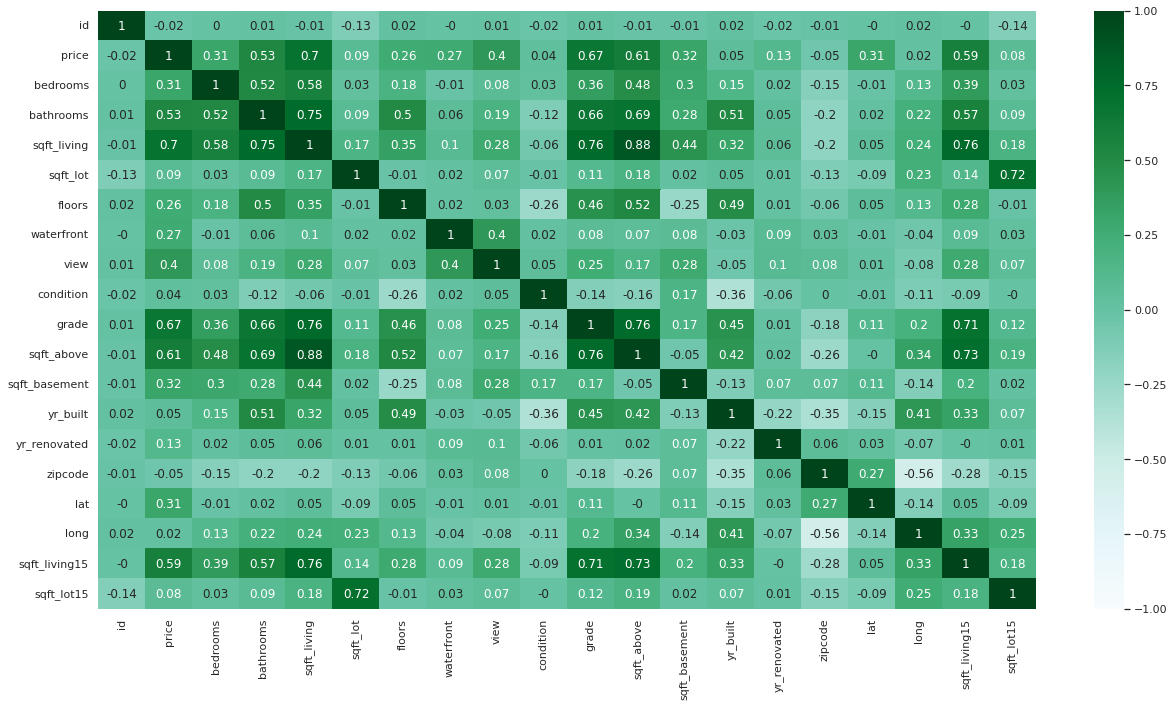

In [ ]:
corrs = df.corr().round(2)

sns.set(rc = {'figure.figsize': (21,11)})
sns.heatmap(corrs, vmin=-1, vmax=1, cmap ='BuGn', annot_kws={'size':12}, annot=True)

Las variables que tienen más correlación con la variable precio es sqft_living, grede, sqft_above y sqft_living15 y son las que se utilizarán para generar las regresiones múltiples

In [ ]:
y = df[['price']]
X = df[['sqft_living','grade','sqft_above', 'sqft_living15']]

In [ ]:
#Estandarizando los datos (variables predictoras)
from sklearn import preprocessing
dfr_s = preprocessing.scale(X)
dfr_scale = pd.DataFrame(dfr_s, columns=X.columns)
dfr_scale.head()

,sqft_living,grade,sqft_above,sqft_living15
0,-0.979835,-0.558836,-0.734708,-0.943355
1,0.533634,-0.558836,0.460841,-0.432686
2,-1.426254,-1.409587,-1.229834,1.070140
3,-0.130550,-0.558836,-0.891699,-0.914174
4,-0.435422,0.291916,-0.130895,-0.272190


In [ ]:
#Generando la partición
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfr_scale, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 4)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 4)


## Regresion Lineal Múltiple

In [ ]:
#Regresión lineal
from sklearn.linear_model import LinearRegression

#Definimos el  modelo
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Obteniendo el coeficiente y el interceptor
linear_reg.coef_, linear_reg.intercept_

(array([[206902.13360381, 123477.88365986, -70347.94054903,
          20545.55629171]]), array([539671.96375741]))

$206,902*sqft_living+123,477*grade-70,347*sqft_above	+20,545*sqft_living15+539,671$

In [ ]:
#Predicción 
y_pred_mult = linear_reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_mult = mean_squared_error(
        y_true  = y_test,
        y_pred  =  y_pred_mult,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {mse_mult}")


El error (rmse) de test es: 268199.5553047453


In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score
print(r2_score(y_test,y_pred_mult))

0.5434354191181615


In [ ]:
#Calculando la R2
precision = linear_reg.score(X_test, y_test)
precision

0.5434354191181615

## Regresión Polinomial

In [ ]:
#Regresión polinomial
from sklearn.preprocessing import PolynomialFeatures
poli_reg2 = PolynomialFeatures(degree = 2)

In [ ]:
X_train_poli2 = poli_reg.fit_transform(X_train)
X_test_poli2 = poli_reg.fit_transform(X_test)

In [ ]:
#Definimos el algoritmo a utilizar
from sklearn import linear_model
poly = linear_model.LinearRegression()

In [ ]:
#Entrenamos el modelo
poly.fit(X_train_poli2, y_train)

LinearRegression()

In [ ]:
#Realizamos una predicción
Y_pred_poly = poly.predict(X_test_poli2)

In [ ]:
print('Valor de la pendiente o coeficiente "a":')
print(poly.coef_)

Valor de la pendiente o coeficiente "a":
[[      0.          193389.12702506  118372.91887325 -108663.63746423
    34065.07036588  -77137.13232337   69511.58079301  174903.38987296
    10105.48753299   16838.64276158  -20200.44540403  -25630.0090936
   -80236.60872497  -42276.65664742   24097.28534434]]


In [ ]:
print('Valor de la intersección o coeficiente "b":')
print(poly.intercept_)

Valor de la intersección o coeficiente "b":
[506698.27508426]


In [ ]:
from sklearn.metrics import mean_squared_error
rmse_poly2 = mean_squared_error(
        y_true  = y_test,
        y_pred  =  Y_pred_poly,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse_poly2}")


El error (rmse) de test es: 229966.81849062524


In [ ]:
print('Precisión del modelo:')
print(poly.score(X_train_poli2, y_train))

Precisión del modelo:
0.6147069808530736


## Regresion Ridge

In [ ]:
from sklearn.linear_model import Ridge
#Definimos el modelo
Ridge_model = Ridge()
Ridge_model.fit(X_train,y_train)

Ridge()

In [ ]:
pred_r = Ridge_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


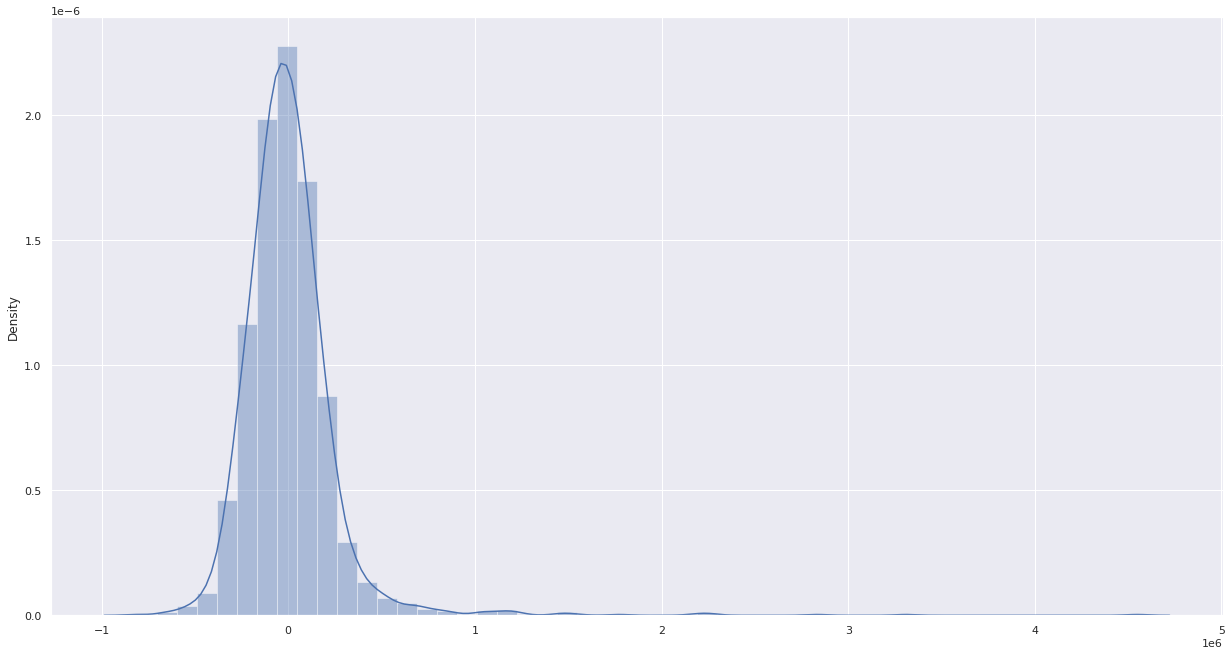

In [ ]:
sns.distplot(y_test-pred_r)

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score
print(r2_score(y_test,pred_r))

0.5434338081812287


In [ ]:
from sklearn.metrics import mean_squared_error
rmse_ridge = mean_squared_error(
        y_true  = y_test,
        y_pred  =  pred_r,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse_ridge}")


El error (rmse) de test es: 268200.0284603579


In [ ]:
#Sacando la R2
precision = Ridge_model.score(X_test, y_test)
precision

0.5434338081812287

## Regresion Lasso

In [ ]:
from sklearn.linear_model import Lasso
# defininición del modelo
model_lasso = Lasso(alpha=1.0)
model_lasso.fit(X_train,y_train)

Lasso()

In [ ]:
#Predicción 
y_pred_lasso2 = model_lasso.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
rmse_ridge = mean_squared_error(
        y_true  = y_test,
        y_pred  =  y_pred_lasso2,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse_ridge}")


El error (rmse) de test es: 268199.453426756


In [ ]:
#Sacando la R2
precision = model_lasso.score(X_test, y_test)
precision

0.5434357659783389

Explica tus resultados, que método se aproxima mejor, ¿por qué?, ¿qué porcentajes de entrenamiento y evaluación usaste? ¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes?


---

método que más conviene es el de la regresión Polinómica, ya que su  R2  es la de mayor valor absoluto, es de  R2=0.61.

La partición que se utilizó fue el 90% de entrenamiento y el 10% de los datos para validar los modelos.



# Ejercicio 3

Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber dónde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

In [81]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 7.3 MB/s 
     |████████████████████████████████| 1.0 MB 58.2 MB/s 
     |████████████████████████████████| 1.7 MB 44.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 50.3 MB/s 
     |████████████████████████████████| 6.3 MB 34.2 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=930a702ab6aa4465a0bd35f6361e0defdd326da47efc55e5d0f1e8283a603c10
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=b5965af63f815f1ad569f3130837c5f8e01466897edd5f2b1e3fb3c885e45c86
  Stored in directory: /root/.

In [82]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

In [83]:
#Importando base de datos
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

In [84]:
#Mostrando los datos
df.head()

,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [85]:
df.info()#Mostrando informacion de los datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [86]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

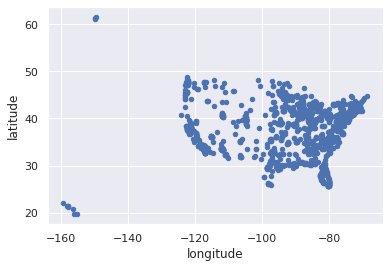

In [87]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [88]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.

In [89]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [90]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [91]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [92]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [93]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

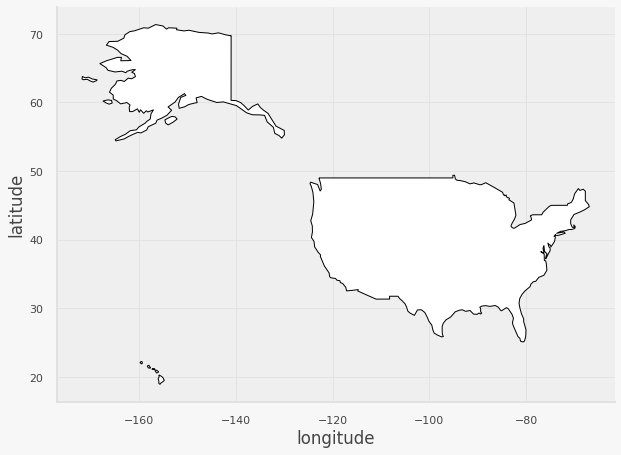

In [94]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

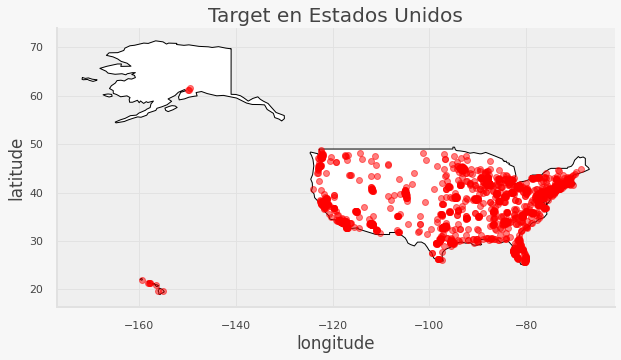

In [95]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes.

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

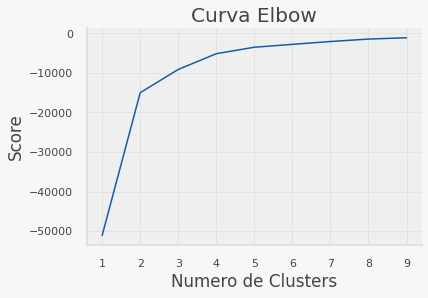

In [96]:
from sklearn.cluster import KMeans

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters] #Evaluando Kmeans de cada cluster para ver cual es mejor.

Y_axis = latlong[['latitude']]
X_axis = latlong[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))] #Evalua tus componentes minimos, 


# Visualizar datos
plt.plot(K_clusters, score)
plt.xlabel('Numero de Clusters')
plt.ylabel('Score')
plt.title('Curva Elbow')
plt.show()

In [106]:

#En la gráfica de codo, nos ayuda a elegir el número de clústers 
kmeans = KMeans(n_clusters = 2, init ='k-means++') 
# Entreanndo el modelo de kmeans 
kmeans.fit(latlong[latlong.columns[0:2]])
# ahora guardamos los resultados
labels = kmeans.labels_
labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [107]:
X = df[["longitude","latitude"]]
#Entrenado el modelo
kmeans = KMeans(n_clusters=2).fit(X) 
#Calculando los centroides
centroids = kmeans.cluster_centers_
labels = kmeans.predict(X)  
# Obteniendo los centros de cada cluster
Cluster_center = kmeans.cluster_centers_

#Se genera un dataframe con las dos columnas de las coordenadas
Cluster_DF = pd.DataFrame(Cluster_center) 
Cluster_DF["Coordinates"] = list(zip(Cluster_DF[0], Cluster_DF[1]))
#Creando los puntos de las coordenadas a partir del dataframe 
Cluster_DF["Coordinates"] = Cluster_DF["Coordinates"].apply(Point) 


gdf_C = gpd.GeoDataFrame(Cluster_DF, geometry="Coordinates")
gdf_C

,0,1,Coordinates
0,-116.900187,37.717441,POINT (-116.90019 37.71744)
1,-84.198138,37.814310,POINT (-84.19814 37.81431)


/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


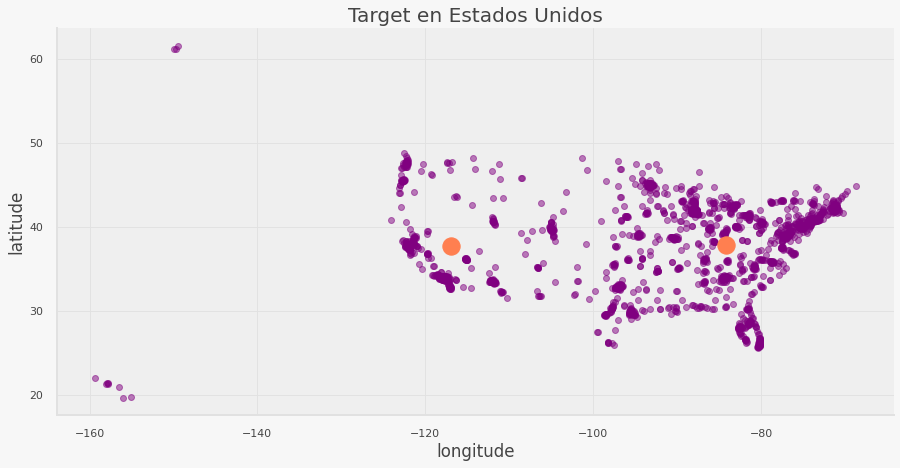

In [122]:
fig, gax = plt.subplots(figsize=(15,10))

world.query("name == 'EStados Unidos de América'").plot(ax = gax, edgecolor='', color='white') #Jalamos mapa de US

#Graficando los datos originales
gdf.plot(ax=gax, color='Purple', alpha = 0.5) 
gdf_C.plot(ax=gax, color='coral', alpha = 1, markersize = 300) 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [123]:
#Número de tiendas por cluster
latlong['kmeans'] = kmeans.labels_ 
latlong.loc[:, 'kmeans'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1    1401
0     438
Name: kmeans, dtype: int64

In [124]:
gdf_C

,0,1,Coordinates
0,-116.900187,37.717441,POINT (-116.90019 37.71744)
1,-84.198138,37.814310,POINT (-84.19814 37.81431)


In [125]:
from pandas.core.internals.concat import concat_arrays

#Obtenemos los valores de nuestro dataset de clusters, obtenemos las geolocalizaciones, 
Location1 = str(gdf_C[1][0]) + ", " + str(gdf_C[0][0]) 
print(Location1)
Location2 = str(gdf_C[1][1]) + ", " + str(gdf_C[0][1])
print(Location2)

37.71744103447488, -116.90018712305937
37.81430972469665, -84.1981379588865


In [126]:
from geopy.geocoders.yandex import Location
from geopy.geocoders import Nominatim 
from geopy.distance import geodesic

geolocator = Nominatim(user_agent="my-application")
Locations = [Location1, Location2]

for i in Locations:
  location = geolocator.reverse(i)  
  print('almacen en ---', location.address)

almacen en --- Nye County, Nevada, United States
almacen en --- 342, Walker Parke Road, Madison County, Kentucky, 40475, United States


In [127]:
#Aqui sacamos las distancias entre los 3 almacenes

distancia1 = (geodesic(Location1, Location2).miles)
print("\nDistancia entre almacen 1 y almacen 2 : ", distancia1, " ft2 \n") 




Distancia entre almacen 1 y almacen 2 :  1781.1463990654006  ft2 



Encuentra las latitudes y longitudes de los almacenes.
¿Qué ciudades?

 Nye County, Nevada, Walker Parke Road, Madison County, Kentucky, 40475, United States

¿A cuantas tiendas va surtir?

2 tiendas

¿Sabes a que distancia estará?

Distancia entre almacen 1 y almacen 2 : 1781.1

¿Cómo elegiste el número de almacenes? justifica tu respuesta técnicamente.

Se eligieron basados en la distribucion geografica de las tiendas de Target alrededor de estados unidos, y en base a la gráfica de codo.

Adicionalmente, en el notebook notaras que al inicio exploramos los datos y los graficamos de manera simple, después nos auxiliamos de una librería de datos geográficos.

¿qué librerías nos pueden ayudar a graficar este tipo de datos?

Geopandas

¿Consideras importante que se grafique en un mapa?

Si

¿por qué?

La visualización de datos ha tomado importancia en los últimos años, ya que es evidente que nos da una idea del comportamiento de los datos y a partir de estas visualización nos podemos dar una idea general de lo que podemos esperar o bien nos da la dirección de hacia donde dirigir el modelo o análisis, además de que es de gran apoyo para poder explicar nuestros resultados.